# Training Models


Imports


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn import tree
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier

In [2]:
train_df = pd.read_csv("../Data/train_set.csv")

In [3]:
test_df = pd.read_csv("../Data/test_set.csv")

Get the training features and label


In [4]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

Get the testing features and label


In [5]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

Initialize a 5-fold cross-validation object


In [6]:
KF = KFold(n_splits=5)

## KNN


In [7]:
KNN = KNeighborsClassifier()

In [8]:
param_grid = {"n_neighbors": list(range(1, int(np.sqrt(len(X_train))), 2))}

In [9]:
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=KF, verbose=2)

In [10]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             verbose=2)

In [11]:
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 23}


In [12]:
KNN_best = KNeighborsClassifier(**best_params)

In [13]:
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [14]:
predictions = KNN_best.predict(X_test)

In [15]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72       502
           1       0.73      0.47      0.57       464

    accuracy                           0.66       966
   macro avg       0.68      0.66      0.65       966
weighted avg       0.68      0.66      0.65       966



## Naive Bayes


In [16]:
NB = GaussianNB()

In [17]:
precisions = []
recalls = []
accuracies = []
f1_scores = []

In [18]:
fold = 1
for train, test in KF.split(X_train, y_train):
    print(f"##### FOLD: {fold} #####")

    # Fit the model
    NB.fit(X_train[train], y_train[train])

    # Predict on the test set
    predictions = NB.predict(X_train[test])

    # Evaluate the model
    precision = precision_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    recall = recall_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    accuracy = accuracy_score(y_true=y_train[test], y_pred=predictions)
    f1 = f1_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )

    # Store the result
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Print the scores for each fold
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"Accuracy = {accuracy}")
    print(f"F1 score = {f1}\n")

    fold += 1

##### FOLD: 1 #####
Precision = 0.6492506957138692
Recall = 0.6139896373056994
Accuracy = 0.6139896373056994
F1 score = 0.5799437441265307

##### FOLD: 2 #####
Precision = 0.6220775551153104
Recall = 0.6062176165803109
Accuracy = 0.6062176165803109
F1 score = 0.5689889590779077

##### FOLD: 3 #####
Precision = 0.6410835172316129
Recall = 0.6023316062176166
Accuracy = 0.6023316062176166
F1 score = 0.5367035362386025

##### FOLD: 4 #####
Precision = 0.663029444222148
Recall = 0.5958549222797928
Accuracy = 0.5958549222797928
F1 score = 0.534202223708369

##### FOLD: 5 #####
Precision = 0.6407881161271873
Recall = 0.6049222797927462
Accuracy = 0.6049222797927462
F1 score = 0.5481419199519214



In [19]:
print("Mean Scores:")
print(f"Mean Precision = {np.mean(precisions)}")
print(f"Mean Recall = {np.mean(recalls)}")
print(f"Mean Accuracy = {np.mean(accuracies)}")
print(f"Mean F1 score = {np.mean(f1_scores)}")

Mean Scores:
Mean Precision = 0.6432458656820256
Mean Recall = 0.6046632124352331
Mean Accuracy = 0.6046632124352331
Mean F1 score = 0.5535960766206662


In [20]:
predictions = NB.predict(X_test)

In [21]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.58      0.94      0.71       502
           1       0.79      0.25      0.38       464

    accuracy                           0.61       966
   macro avg       0.68      0.60      0.55       966
weighted avg       0.68      0.61      0.56       966



## CART


In [22]:
Cart = DecisionTreeClassifier()

In [23]:
param_grid = {
    "max_depth": [None, 10, 20, 30],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
    "ccp_alpha": [0, 1, 0.01, 0.001],
    "min_samples_split": [2, 3, 4],
}

In [24]:
grid_search = GridSearchCV(estimator=Cart, param_grid=param_grid, cv=KF, verbose=2)

In [25]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_sa

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 1, 0.01, 0.001],
                         'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1.5, 1: 2.5}, {0: 1.5, 1: 3}],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [26]:
best_params = grid_search.best_params_
print(best_params)

{'ccp_alpha': 0.001, 'class_weight': None, 'max_depth': 10, 'min_samples_split': 3}


In [27]:
Cart_best = DecisionTreeClassifier(**best_params)

In [28]:
Cart_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_split=3)

In [29]:
predictions = Cart_best.predict(X_test)

In [30]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       502
           1       0.71      0.49      0.58       464

    accuracy                           0.66       966
   macro avg       0.67      0.65      0.64       966
weighted avg       0.67      0.66      0.65       966



[Text(0.6625, 0.9375, 'x[21] <= 0.5\ngini = 0.498\nsamples = 3860\nvalue = [2066, 1794]'),
 Text(0.475, 0.8125, 'x[2] <= 2.568\ngini = 0.485\nsamples = 3278\nvalue = [1920, 1358]'),
 Text(0.25, 0.6875, 'x[16] <= 0.5\ngini = 0.499\nsamples = 1848\nvalue = [971.0, 877.0]'),
 Text(0.2, 0.5625, 'x[32] <= 0.5\ngini = 0.497\nsamples = 1796\nvalue = [964, 832]'),
 Text(0.1, 0.4375, 'x[20] <= 0.5\ngini = 0.5\nsamples = 989\nvalue = [486, 503]'),
 Text(0.05, 0.3125, 'gini = 0.499\nsamples = 720\nvalue = [374.0, 346.0]'),
 Text(0.15, 0.3125, 'x[2] <= 0.431\ngini = 0.486\nsamples = 269\nvalue = [112, 157]'),
 Text(0.1, 0.1875, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.2, 0.1875, 'gini = 0.492\nsamples = 257\nvalue = [112, 145]'),
 Text(0.3, 0.4375, 'x[2] <= 0.567\ngini = 0.483\nsamples = 807\nvalue = [478.0, 329.0]'),
 Text(0.25, 0.3125, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.35, 0.3125, 'x[12] <= 0.5\ngini = 0.479\nsamples = 779\nvalue = [470.0, 309.0]'),
 Text(0.3, 

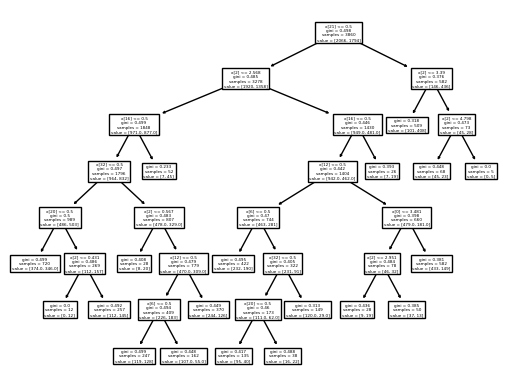

In [31]:
tree.plot_tree(Cart_best)

## Random Forest


In [7]:
RF = RandomForestClassifier(n_jobs=5)

In [8]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced", "balanced_subsample", None],
}

In [9]:
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=KF, verbose=2)

In [10]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=5),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [11]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [12]:
RF_best = RandomForestClassifier(**best_params)

In [13]:
RF_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [14]:
predictions = RF_best.predict(X_test)

In [15]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       502
           1       0.73      0.50      0.60       464

    accuracy                           0.67       966
   macro avg       0.69      0.67      0.66       966
weighted avg       0.68      0.67      0.66       966



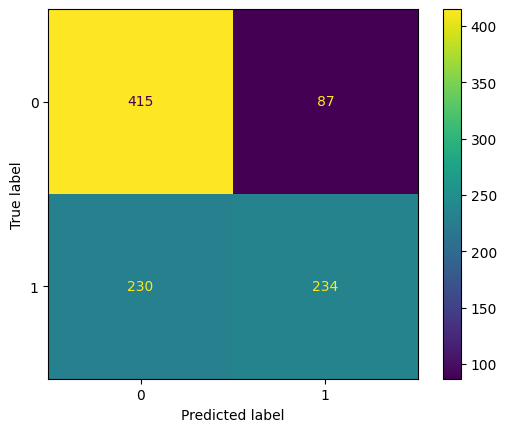

In [17]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Feature ranking:
1. feature AvgPrice (0.19839542131864782)
2. feature CanceledOrdersRatio_None (0.11285391170626231)
3. feature Age (0.0977497989288533)
4. feature CompletedOrdersRatio_All (0.05313322020628504)
5. feature CanceledOrdersRatio_Moderate (0.0375760097659048)
6. feature Most_Frequent_SectorName_Financials (0.03394685743147916)
7. feature RiskRate_NotAssigned (0.030951219559670163)
8. feature CompletedOrdersRatio_None (0.026219332213493093)
9. feature CanceledOrdersRatio_Little (0.025612699206309323)
10. feature CompletedOrdersRatio_Lessthanhalf (0.023964948847491924)
11. feature AvgOrderRate_Difference_Increased (0.023581265931931324)
12. feature Most_Frequent_OrderType_Buy (0.021913417069704004)
13. feature Most_Frequent_OrderType_Sell (0.021535344192055463)
14. feature IsMale (0.01995875433531062)
15. feature AvgQuantityOrderedRate_Difference_Increased (0.01968278262768187)
16. feature RiskRate_Medium (0.018951539667954643)
17. feature CanceledOrdersRatio_Most (0.01795300

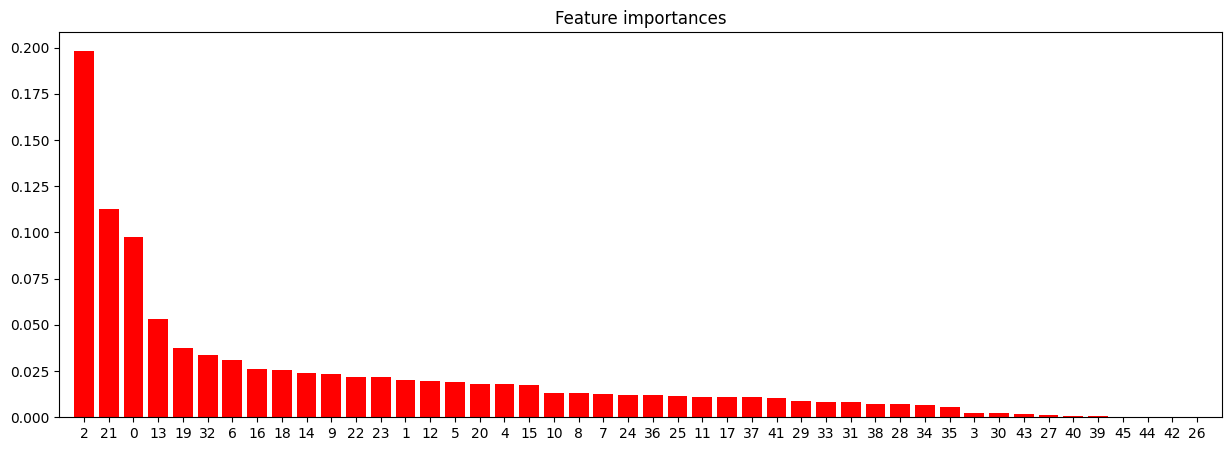

In [22]:
importances = RF_best.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

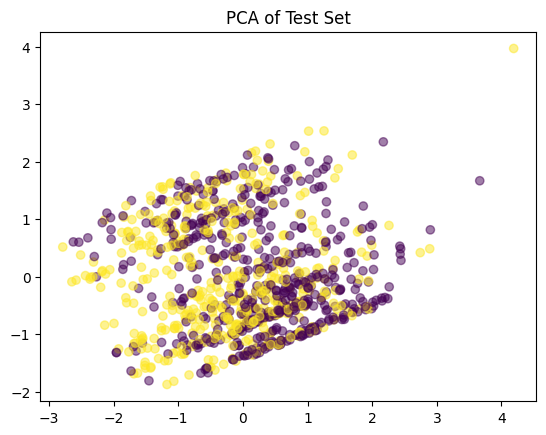

In [25]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_test)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_test, cmap="viridis", alpha=0.5)
plt.title("PCA of Test Set")
plt.show()

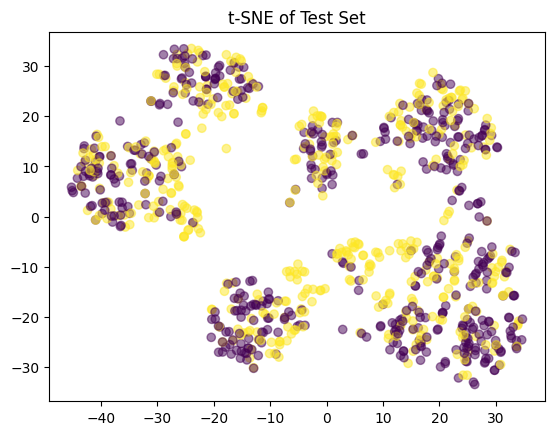

In [26]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_test)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_test, cmap="viridis", alpha=0.5)
plt.title("t-SNE of Test Set")
plt.show()

## XGBoost


In [28]:
xgb = XGBClassifier(random_state=42)

In [32]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
}

In [33]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=KF,
    verbose=2,
)

In [34]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [37]:
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}


In [38]:
XGB_Best = XGBClassifier(**best_params)

In [40]:
XGB_Best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
predictions = XGB_Best.predict(X_test)

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       502
           1       0.75      0.51      0.61       464

    accuracy                           0.68       966
   macro avg       0.70      0.68      0.67       966
weighted avg       0.70      0.68      0.67       966



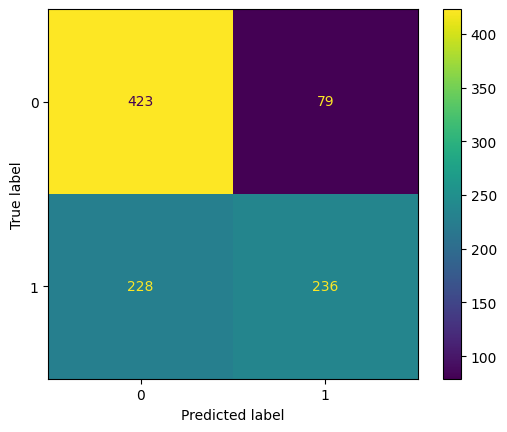

In [43]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Feature ranking:
1. feature CanceledOrdersRatio_None (0.1807156205177307)
2. feature CompletedOrdersRatio_All (0.05239155888557434)
3. feature CompletedOrdersRatio_None (0.047945547848939896)
4. feature RiskRate_NotAssigned (0.032122913748025894)
5. feature CanceledOrdersRatio_Most (0.031248286366462708)
6. feature AvgQuantityOrderedRate_Difference_Increased (0.030057158321142197)
7. feature CanceledOrdersRatio_All (0.029747141525149345)
8. feature AvgPrice (0.026856880635023117)
9. feature AvgQuantityOrderedRate_Difference_Constant (0.026721935719251633)
10. feature Most_Frequent_SectorName_Financials (0.026515191420912743)
11. feature CanceledOrdersRatio_Little (0.026141278445720673)
12. feature AvgOrderRate_Difference_Increased (0.02563970349729061)
13. feature CanceledOrdersRatio_Moderate (0.02553003840148449)
14. feature RiskRate_Medium (0.025118013843894005)
15. feature Most_Frequent_SectorName_ConsumerStaples (0.022789644077420235)
16. feature Most_Frequent_SectorName_FOOD (0.02

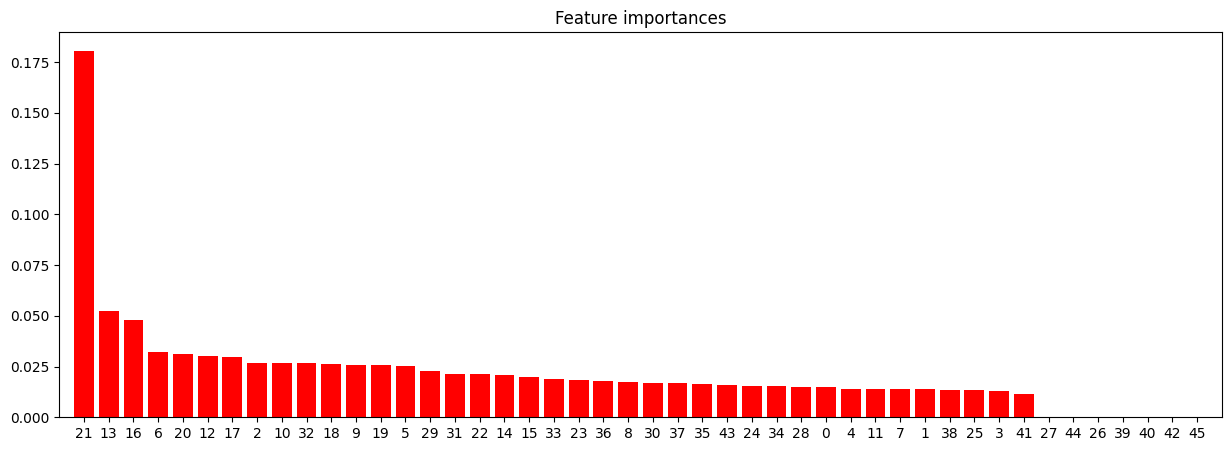

In [44]:
importances = XGB_Best.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [50]:
misclassified = X_test[(y_test == 1) & (predictions == 0)]
misclassified

,Age,IsMale,AvgPrice,RiskRate_High,RiskRate_Low,RiskRate_Medium,RiskRate_NotAssigned,AvgOrderRate_Difference_Constant,AvgOrderRate_Difference_Decreased,AvgOrderRate_Difference_Increased,...,Most_Frequent_SectorName_Industries,Most_Frequent_SectorName_InformationTechnology,Most_Frequent_SectorName_Materials,Most_Frequent_SectorName_Others,Most_Frequent_SectorName_REALESTATE,Most_Frequent_SectorName_RealEstate,Most_Frequent_SectorName_SERVICES,Most_Frequent_SectorName_TelecommunicationServices,Most_Frequent_SectorName_Telecommunications,Most_Frequent_SectorName_Tourism
0,4.094345,0,3.348502,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,3.970292,1,1.097923,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,4.234107,1,2.079374,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
13,4.330733,1,3.928782,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,3.713572,0,3.624111,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.663562,0,3.596351,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
944,4.043051,0,1.870816,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
945,3.465736,1,2.188021,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
946,3.044522,1,3.384739,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression


In [41]:
LR = LogisticRegression(n_jobs=5)

In [42]:
param_grid = {
    "tol": [0.001, 0.0001, 0.00001],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [2000, 6000, 10000],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
}

In [43]:
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=KF, verbose=2)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.4s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=1e

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=1e-05; total time=   1.1s
[CV] END class_weight=None, max_iter=6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=1e-05; total time=   1.1s
[CV] END class_weight=None,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.2s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 2},

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.2s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1, 1: 3},

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.2s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.2s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=   1.1s
[CV] END class_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.f

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(n_jobs=5),
             param_grid={'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1.5, 1: 2.5}, {0: 1.5, 1: 3}],
                         'max_iter': [2000, 6000, 10000],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [45]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'max_iter': 2000, 'solver': 'lbfgs', 'tol': 0.001}


In [46]:
LR_best = LogisticRegression(**best_params)

In [47]:
LR_best.fit(X_train, y_train)

LogisticRegression(max_iter=2000, tol=0.001)

In [48]:
predictions = LR_best.predict(X_test)

In [49]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       502
           1       0.71      0.56      0.62       464

    accuracy                           0.68       966
   macro avg       0.68      0.67      0.67       966
weighted avg       0.68      0.68      0.67       966



## SVM


In [50]:
SVM = SVC()

In [51]:
param_grid = {
    "tol": [0.001, 0.0001, 0.00001],
    "kernel": ["poly", "rbf", "sigmoid"],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 2.5},
        {0: 1.5, 1: 2.5},
        {0: 1, 1: 3},
    ],
}

In [52]:
grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=KF, verbose=2)

In [53]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.3s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=   0.2s
[CV] END ..........class_weight=None, kernel=poly, tol=1e-05; total time=   0.2s
[CV] END ..........class_weight=None, kernel=po

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 2.5},
                                          {0: 1.5, 1: 2.5}, {0: 1, 1: 3}],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [54]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'kernel': 'poly', 'tol': 0.001}


In [55]:
SVM_best = SVC(**best_params)

In [56]:
SVM_best.fit(X_train, y_train)

SVC(kernel='poly')

In [57]:
predictions = SVM_best.predict(X_test)

In [58]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       502
           1       0.76      0.45      0.57       464

    accuracy                           0.67       966
   macro avg       0.70      0.66      0.65       966
weighted avg       0.70      0.67      0.65       966



## Neural Network


In [59]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, mode="min", verbose=1)

In [60]:
nn = Sequential()
nn.add(Dense(256, activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1, activation="sigmoid"))

nn.compile(optimizer="adam", loss="binary_crossentropy")

In [61]:
precisions = []
recalls = []
accuracies = []
f1_scores = []

In [62]:
fold = 1
for train, test in KF.split(X_train, y_train):
    print(f"##### FOLD: {fold} #####")

    # Fit the model
    nn.fit(
        X_train[train],
        y_train[train],
        epochs=200,
        batch_size=32,
        validation_data=(X_train[test], y_train[test]),
        callbacks=[early_stopping],
        verbose=0,
    )

    # Predict on the test set
    y_pred = nn.predict(X_train[test])

    predictions = []
    for pred in y_pred:
        if pred > 0.5:
            predictions.append(1)
        else:
            predictions.append(0)

    # Evaluate the model
    precision = precision_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    recall = recall_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    accuracy = accuracy_score(y_true=y_train[test], y_pred=predictions)
    f1 = f1_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )

    # Store the result
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Print the scores for each fold
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"Accuracy = {accuracy}")
    print(f"F1 score = {f1}\n")

    fold += 1

##### FOLD: 1 #####
Epoch 15: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
Precision = 0.6617474154480107
Recall = 0.6580310880829016
Accuracy = 0.6580310880829016
F1 score = 0.6533198251894772

##### FOLD: 2 #####
Epoch 11: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
Precision = 0.6545706883789785
Recall = 0.6502590673575129
Accuracy = 0.6502590673575129
F1 score = 0.6508395131795929

##### FOLD: 3 #####
Epoch 11: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
Precision = 0.6885864688674214
Recall = 0.6878238341968912
Accuracy = 0.6878238341968912
F1 score = 0.6821512637638343

##### FOLD: 4 #####
Epoch 11: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
Precision = 0.7334271344349933
Recall = 0.7085492227979274
Accuracy = 0.7085492227979274
F1 score = 0.6968305411761652

##### FOLD: 5 #####
Epoch 11: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
Precision = 0.7123677887244837
Recall = 0.7059585492227979
Accuracy = 0.7059585492227979
F

In [63]:
print("Mean Scores:")
print(f"Mean Precision = {np.mean(precisions)}")
print(f"Mean Recall = {np.mean(recalls)}")
print(f"Mean Accuracy = {np.mean(accuracies)}")
print(f"Mean F1 score = {np.mean(f1_scores)}")

Mean Scores:
Mean Precision = 0.6901398991707774
Mean Recall = 0.6821243523316062
Mean Accuracy = 0.6821243523316062
Mean F1 score = 0.6762753083014708


In [64]:
y_pred = nn.predict(X_test)

predictions = []
for pred in y_pred:
    if pred > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


In [65]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73       502
           1       0.74      0.49      0.59       464

    accuracy                           0.67       966
   macro avg       0.69      0.66      0.66       966
weighted avg       0.69      0.67      0.66       966



## Save Best Model


In [66]:
with open("../RandomForestModel.pkl", "wb") as f:
    pickle.dump(RF_best, f)